In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
filepath = '/content/gdrive/MyDrive' + '/Colab Notebooks/csv/'

df_data = pd.read_csv(filepath + 'BostonHousing.csv')
print(df_data.shape)

Mounted at /content/gdrive
(506, 14)


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
bh_data = np.array(df_data.values, dtype=np.float32)

x_train = np.array(bh_data[:400, :13], dtype=np.float32).reshape(-1, 13)
y_train = np.array(bh_data[:400, 13], dtype=np.float32).reshape(-1, 1)

x_test = np.array(bh_data[400:, :13], dtype=np.float32).reshape(-1, 13)
y_test = np.array(bh_data[400:, 13], dtype=np.float32).reshape(-1, 1)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(400, 13) (400, 1) (106, 13) (106, 1)


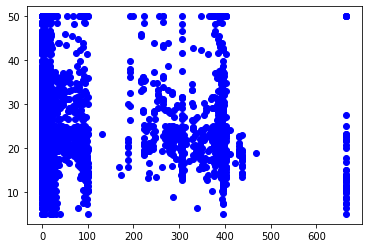

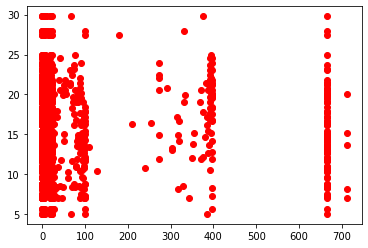

In [5]:
# 훈련 데이터의 x, y 분포도
plt.plot(x_train, y_train, linestyle='None', marker='o', color='b')
plt.show()

# 검정 데이터의 x, y 분포도
plt.plot(x_test, y_test, linestyle='None', marker='o', color='r')
plt.show()

In [6]:
# 난수를 초기값으로 설정 (설명변수의 개수에 맞추어 초기화함.)
w = np.array(np.random.rand(13))
b = np.random.rand()

print(w, b)

[0.70007286 0.92822802 0.59526005 0.90323834 0.11064212 0.37420655
 0.72147011 0.62933407 0.33572568 0.26819327 0.98332658 0.84797353
 0.40406014] 0.6876948701452879


In [7]:
def hypothesis(w, b, x):
    w = np.transpose(w)
    return (w * x + b)

def cost_function(h, y):
    err = (h - y) ** 2
    return np.mean(err)

In [8]:
alpha = 1e-5
epoch = 59500

cost_list = []
for i in range(epoch):
    h = hypothesis(w, b, x_train)
    cost = cost_function(h, y_train)
    cost_list.append(cost)

    w = w - alpha * np.mean((h - y_train) * x_train)
    b = b - alpha * np.mean(h - y_train)

cost_list = np.array(cost_list)

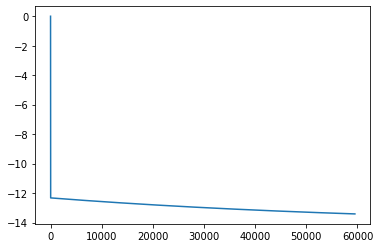

In [9]:
plt.plot(10.0 * np.log(cost_list / (np.max(cost_list) + 1e-5)))
plt.show()

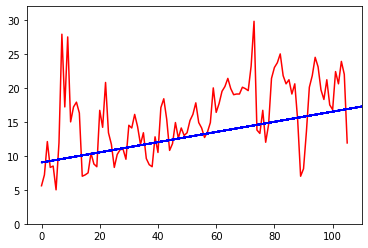

In [10]:
w_exp = np.mean(w)
y_pred = hypothesis(w_exp, b, x_test)

plt.ylim([0, 32])
plt.xlim([-5, 110])
plt.plot(y_test, 'r')
plt.plot(x_test, y_pred, 'b')
plt.show()